In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')

Next, we'll begin to build the visualization function:



In [2]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')

At this point, we could graph any company:



In [ ]:
    df['AAPL'].plot()
    plt.show()

Let's look into the correlation of all of these companies. Building a correlation table in Pandas is actually unbelievably simple:

In [ ]:
    df_corr = df.corr()
    print(df_corr.head())

The .corr() automatically will look at the entire DataFrame, and determine the correlation of every column to every column. I've seen paid websites do exactly this as a service. So, if you need some side capital, there you have it!

In [ ]:
    df_corr.to_csv('sp500corr.csv')

Instead, we're going to graph it. To do this, we're going to make a heatmap. There isn't a super simple heat map built into Matplotlib, but we have the tools to make on anyway. To do this, first we need the actual data itself to graph:

In [ ]:
    data1 = df_corr.values

This will give us a numpy array of just the values, which are the correlation numbers. Next, we'll build our figure and axis. Then we'll create a heatmap.

In [ ]:
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)

This heatmap is made using a range of colors, which can be a range of anything to anything, and the color scale is generated from the cmap that we use. You can find all of the options for color maps here. We're going to use RdYlGn, which is a colormap that goes from red on the low side, yellow for the middle, and green for the higher part of the scale, which will give us red for negative correlations, green for positive correlations, and yellow for no-correlations. We'll add a side-bar that is a colorbar as a sort of "scale" for us:

Next, we're going to set our x and y axis ticks so we know which companies are which, since right now we've only just plotted the data:

In [ ]:
    fig1.colorbar(heatmap1)
    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()

What this does is simply create tick markers for us. We don't yet have any labels.

This will flip our yaxis, so that the graph is a little easier to read, since there will be some space between the x's and y's. Generally matplotlib leaves room on the extreme ends of your graph since this tends to make graphs easier to read, but, in our case, it doesn't. Then we also flip the xaxis to be at the top of the graph, rather than the traditional bottom, again to just make this more like a correlation table should be. Now we're actually going to add the company names to the currently-nameless ticks:

We rotate the xticks, which are the actual tickers themselves, since normally they'll be written out horizontally. We've got over 500 labels here, so we're going to rotate them 90 degrees so they're vertical. It's still a graph that's going to be far too large to really see everything zoomed out, but that's fine. The line that says heatmap1.set_clim(-1,1) just tells the colormap that our range is going to be from -1 to positive 1. It should already be the case, but we want to be certain. Without this line, it should still be the min and max of your dataset, so it would have been pretty close anyway.

In [ ]:
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1,1)
    plt.tight_layout()
    #plt.savefig("correlations.png", dpi = (300))
    plt.show()

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.948626  0.917590  0.793535  0.966675  0.926923  0.930757   
ABT   0.948626  1.000000  0.870608  0.722083  0.960316  0.889726  0.878065   
ABBV  0.917590  0.870608  1.000000  0.758086  0.782810  0.740370  0.868343   
ABMD  0.793535  0.722083  0.758086  1.000000  0.860758  0.864955  0.872125   
ACN   0.966675  0.960316  0.782810  0.860758  1.000000  0.939226  0.924783   

           AMD       AAP       AES  ...      WLTW      WYNN       XEL  \
MMM  -0.521923  0.967229 -0.290799  ...  0.877940  0.659864  0.941822   
ABT  -0.601495  0.958861 -0.247201  ...  0.811535  0.737949  0.946977   
ABBV  0.188658  0.896813  0.056811  ...  0.804627 -0.303637  0.792071   
ABMD -0.247162  0.844651  0.022127  ...  0.684755  0.295920  0.830728   
ACN  -0.511405  0.963566  0.040392  ...  0.845872  0.664848  0.980970   

           XRX        XL       XYL       YUM       ZBH      ZION       ZTS  
MMM  -0.039298 

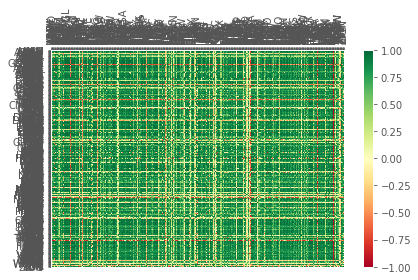

In [4]:
import bs4 as bs
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import os
import pandas as pd
import pandas_datareader.data as web
import pickle
import requests

style.use('ggplot')

def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df_corr = df.corr()
    print(df_corr.head())
    df_corr.to_csv('sp500corr.csv')
    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()


visualize_data()